In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
np.random.seed(10)

In [2]:
x = np.arange(10,30,2)
y = np.arange(50,70,2)
x,y

(array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
 array([50, 52, 54, 56, 58, 60, 62, 64, 66, 68]))

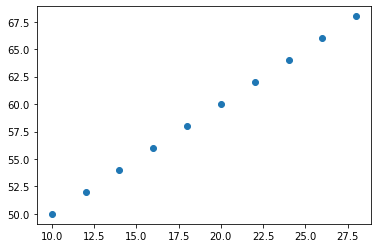

In [3]:
plt.scatter(x, y)

In [4]:
cov_xy = np.cov([x,y])
cov_xy

array([[36.66666667, 36.66666667],
       [36.66666667, 36.66666667]])

In [5]:
m = cov_xy[0][1]/cov_xy[0][0]
m

1.0

In [6]:
b = np.mean(y)-m*np.mean(x)
b

40.0

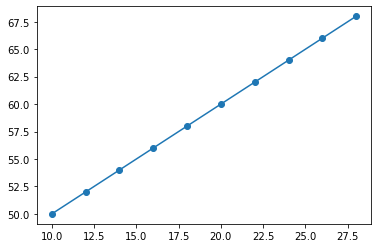

In [7]:
plt.scatter(x, y)
a = np.linspace(10,28,10)
plt.plot(a, m*x+b)# just a random line


In [8]:
data = {'x':x, 'y':y}
test_df = pd.DataFrame(data)
test_df

,x,y
0,10,50
1,12,52
2,14,54
3,16,56
4,18,58
5,20,60
6,22,62
7,24,64
8,26,66
9,28,68


In [9]:
# Create linear regression object
reg = linear_model.LinearRegression()
lin_xy = reg.fit(test_df.drop('x', axis = 1),y)

In [10]:
lin_xy.coef_

array([1.])

In [11]:
lin_xy.intercept_

3.552713678800501e-14

In [12]:
housing_df = pd.read_csv('housing.csv')
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
reg = linear_model.LinearRegression()
price_mod = reg.fit(housing_df[['total_rooms','housing_median_age']],housing_df['median_house_value'])

In [14]:
price_mod.coef_, price_mod.intercept_

(array([  10.48236786, 1624.87842801]), 132691.09500892978)

In [15]:
price_mod.predict([[1000,30]])

array([191919.8157066])

In [16]:
iris = pd.read_csv('Iris.csv')
iris.dropna(inplace = True)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
iris.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[1,2,3], inplace = True)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [18]:
reg = linear_model.LinearRegression()
species_mod = reg.fit(iris.drop(['Id','Species'], axis = 1),iris.Species)

In [19]:
species_mod.coef_,species_mod.intercept_

(array([-0.10974146, -0.04424045,  0.22700138,  0.60989412]),
 1.1920839948281436)

In [20]:
iris['Predicted Species'] = species_mod.predict(iris.drop(['Id','Species'], axis =1))
iris['Error'] = iris['Species']-iris['Predicted Species']
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted Species,Error
0,1,5.1,3.5,1.4,0.2,1,0.917342,0.082658
1,2,4.9,3.0,1.4,0.2,1,0.961410,0.038590
2,3,4.7,3.2,1.3,0.2,1,0.951810,0.048190
3,4,4.6,3.1,1.5,0.2,1,1.012609,-0.012609
4,5,5.0,3.6,1.4,0.2,1,0.923892,0.076108
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,2.907259,0.092741
146,147,6.3,2.5,5.0,1.9,3,2.683917,0.316083
147,148,6.5,3.0,5.2,2.0,3,2.746239,0.253761
148,149,6.2,3.4,5.4,2.3,3,2.989833,0.010167


In [21]:
iris['Error'] = iris['Species']-iris['Predicted Species']
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted Species,Error
0,1,5.1,3.5,1.4,0.2,1,0.917342,0.082658
1,2,4.9,3.0,1.4,0.2,1,0.961410,0.038590
2,3,4.7,3.2,1.3,0.2,1,0.951810,0.048190
3,4,4.6,3.1,1.5,0.2,1,1.012609,-0.012609
4,5,5.0,3.6,1.4,0.2,1,0.923892,0.076108
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,2.907259,0.092741
146,147,6.3,2.5,5.0,1.9,3,2.683917,0.316083
147,148,6.5,3.0,5.2,2.0,3,2.746239,0.253761
148,149,6.2,3.4,5.4,2.3,3,2.989833,0.010167


In [22]:
print('MSE is {}'.format(np.mean(iris['Error']**2)))

MSE is 0.04638508831122694


In [23]:
from sklearn.model_selection import train_test_split
iris_1 = iris.drop(['Id','Predicted Species','Error'], axis = 1)
X = iris.drop(['Species'], axis = 1)
y = iris.Species
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)

In [24]:
species_mod = reg.fit(X_train , y_train)

In [25]:
species_mod.coef_,species_mod.intercept_

(array([ 2.79530356e-16, -7.63418413e-02, -3.07759443e-02,  1.57913909e-01,
         4.24273913e-01,  3.04348247e-01,  1.00000000e+00]),
 0.8292753202141849)

In [26]:
predictions = species_mod.predict(X_test)
error = y_test-predictions 
error

33     1.187939e-14
16     1.665335e-14
43     9.103829e-15
129   -1.376677e-14
50     7.771561e-15
           ...     
126   -1.287859e-14
30     1.265654e-14
35     1.176836e-14
125   -1.287859e-14
109   -8.881784e-15
Name: Species, Length: 90, dtype: float64

In [27]:
print('MSE is {}'.format(np.mean(error**2)))

MSE is 1.3056921663077633e-28
